In [273]:
## data visualization lib
import pandas as pd
import seaborn as sea
import numpy as np
import matplotlib.pyplot as plt

## normalization
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split

## metrics
from sklearn.metrics import mean_squared_error
## modelling
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor

In [109]:
df = pd.read_excel(r'csia.xlsx')
df.head()

,product_name,category,price,sales_date,day_of_week,holiday,number_of_items_sold,total_revenue,sales_time,product_id,buyer_gender
0,Milk packet,Dairy,80,2022-09-01,Thursday,False,18,1440,07:58,1022,Men
1,Bread package,Bakery,55,2022-09-01,Thursday,False,8,440,12:00,1011,Men
2,Butter,Dairy,285,2022-09-01,Thursday,False,15,4275,19:56,1078,Women
3,Milk packet,Dairy,80,2022-09-01,Thursday,False,12,960,09:21,1022,Men
4,Bread package,Bakery,55,2022-09-01,Thursday,False,16,880,07:22,1011,Men


In [5]:
df.dtypes

product_name                    object
category                        object
price                            int64
sales_date              datetime64[ns]
day_of_week                     object
holiday                           bool
number_of_items_sold             int64
total_revenue                    int64
sales_time                      object
product_id                       int64
buyer_gender                    object
dtype: object

In [7]:
df.shape

(22321, 11)

In [8]:
df.isnull().sum()

product_name            0
category                0
price                   0
sales_date              0
day_of_week             0
holiday                 0
number_of_items_sold    0
total_revenue           0
sales_time              0
product_id              0
buyer_gender            0
dtype: int64

In [9]:
df.describe()

,price,sales_date,number_of_items_sold,total_revenue,product_id
count,22321.000000,22321,22321.000000,22321.000000,22321.000000
mean,179.557233,2023-04-23 02:57:36.296760832,11.478697,2042.458223,1048.263698
min,55.000000,2022-09-01 00:00:00,1.000000,55.000000,1011.000000
25%,80.000000,2022-12-31 00:00:00,6.000000,605.000000,1022.000000
50%,134.000000,2023-04-28 00:00:00,11.000000,1206.000000,1041.000000
75%,285.000000,2023-08-15 00:00:00,16.000000,2800.000000,1078.000000
max,350.000000,2023-11-30 00:00:00,144.000000,25200.000000,1091.000000
std,116.043786,NaN,9.279767,2229.649949,31.083915


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22321 entries, 0 to 22320
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   product_name          22321 non-null  object        
 1   category              22321 non-null  object        
 2   price                 22321 non-null  int64         
 3   sales_date            22321 non-null  datetime64[ns]
 4   day_of_week           22321 non-null  object        
 5   holiday               22321 non-null  bool          
 6   number_of_items_sold  22321 non-null  int64         
 7   total_revenue         22321 non-null  int64         
 8   sales_time            22321 non-null  object        
 9   product_id            22321 non-null  int64         
 10  buyer_gender          22321 non-null  object        
dtypes: bool(1), datetime64[ns](1), int64(4), object(5)
memory usage: 1.7+ MB


# Product Name

In [12]:
df.product_name.value_counts()

product_name
Bread package    4531
Milk packet      4529
Butter           4522
Eggs             4403
Jam jar          4336
Name: count, dtype: int64

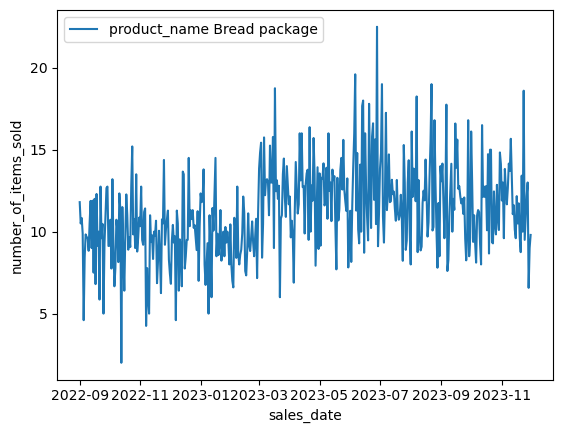

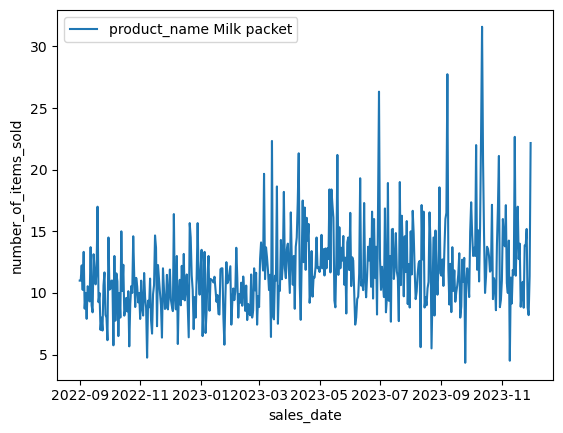

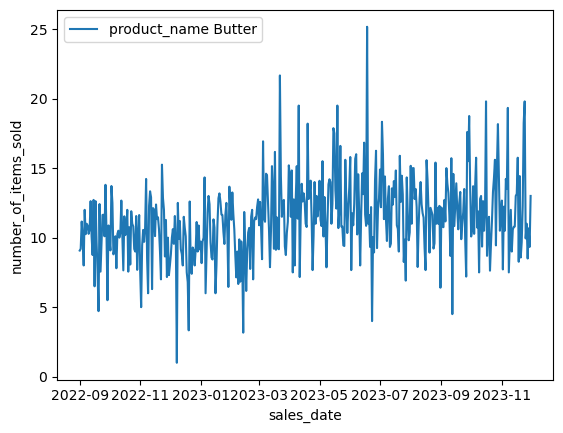

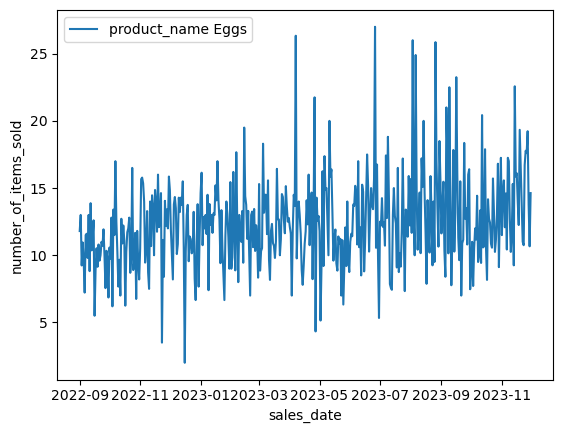

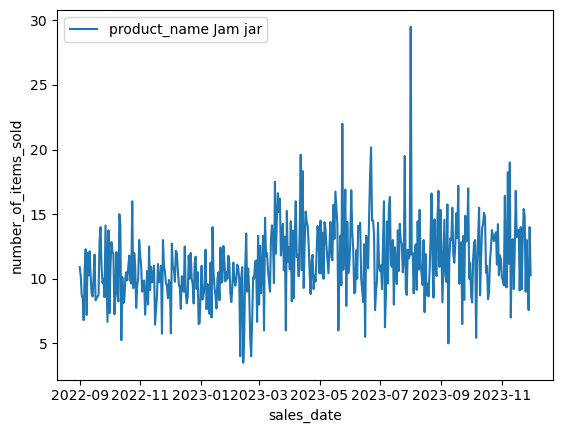

In [49]:
# fig, axes = plt.subplots(nrows=round(len(df.product_name.value_counts().index)/2) + 1, ncols=round(len(df.product_name.value_counts().index)/2) + 1)
# axes = axes.ravel()
for ind, i in enumerate(df.product_name.value_counts().index):
    plt.figure()
    sea.lineplot(df.loc[df["product_name"]==i].groupby("sales_date").agg({'number_of_items_sold':'mean'}), x="sales_date", y='number_of_items_sold'\
             , label="product_name " +i)
    plt.plot()


In [50]:
df

,product_name,category,price,sales_date,day_of_week,holiday,number_of_items_sold,total_revenue,sales_time,product_id,buyer_gender
0,Milk packet,Dairy,80,2022-09-01,Thursday,False,18,1440,07:58,1022,Men
1,Bread package,Bakery,55,2022-09-01,Thursday,False,8,440,12:00,1011,Men
2,Butter,Dairy,285,2022-09-01,Thursday,False,15,4275,19:56,1078,Women
3,Milk packet,Dairy,80,2022-09-01,Thursday,False,12,960,09:21,1022,Men
4,Bread package,Bakery,55,2022-09-01,Thursday,False,16,880,07:22,1011,Men
...,...,...,...,...,...,...,...,...,...,...,...
22316,Butter,Dairy,285,2023-11-30,Thursday,False,32,9120,08:55,1078,Women
22317,Eggs,Dairy,134,2023-11-30,Thursday,False,28,3752,19:53,1041,Women
22318,Bread package,Bakery,55,2023-11-30,Thursday,False,14,770,10:44,1011,Men
22319,Jam jar,Grocery,350,2023-11-30,Thursday,False,8,2800,09:23,1091,Men


In [51]:
df.category.value_counts()

category
Dairy      13454
Bakery      4531
Grocery     4336
Name: count, dtype: int64

In [89]:
df

,product_name,category,price,sales_date,day_of_week,holiday,number_of_items_sold,total_revenue,sales_time,product_id,buyer_gender
0,Milk packet,Dairy,80,2022-09-01,Thursday,False,18,1440,07:58,1022,Men
1,Bread package,Bakery,55,2022-09-01,Thursday,False,8,440,12:00,1011,Men
2,Butter,Dairy,285,2022-09-01,Thursday,False,15,4275,19:56,1078,Women
3,Milk packet,Dairy,80,2022-09-01,Thursday,False,12,960,09:21,1022,Men
4,Bread package,Bakery,55,2022-09-01,Thursday,False,16,880,07:22,1011,Men
...,...,...,...,...,...,...,...,...,...,...,...
22316,Butter,Dairy,285,2023-11-30,Thursday,False,32,9120,08:55,1078,Women
22317,Eggs,Dairy,134,2023-11-30,Thursday,False,28,3752,19:53,1041,Women
22318,Bread package,Bakery,55,2023-11-30,Thursday,False,14,770,10:44,1011,Men
22319,Jam jar,Grocery,350,2023-11-30,Thursday,False,8,2800,09:23,1091,Men


# Creating columns- Month, year out of a date columns

In [198]:
df['Day'] =  df.sales_date.astype(str).str.split('-').str[2].astype(int)
df['Month'] = df.sales_date.astype(str).str.split('-').str[1].astype(int)
df['Year'] = df.sales_date.astype(str).str.split('-').str[0].astype(int)

In [199]:
df.head()

,product_name,category,price,sales_date,day_of_week,holiday,number_of_items_sold,total_revenue,sales_time,product_id,buyer_gender,Month,Year,Day
0,Milk packet,Dairy,80,2022-09-01,Thursday,0,18,1440,07:58,1022,Men,9,2022,1
1,Bread package,Bakery,55,2022-09-01,Thursday,0,8,440,12:00,1011,Men,9,2022,1
2,Butter,Dairy,285,2022-09-01,Thursday,0,15,4275,19:56,1078,Women,9,2022,1
3,Milk packet,Dairy,80,2022-09-01,Thursday,0,12,960,09:21,1022,Men,9,2022,1
4,Bread package,Bakery,55,2022-09-01,Thursday,0,16,880,07:22,1011,Men,9,2022,1


In [157]:
# number of items sold for product categories
def product_line(data, title):
    plt.title(title)
    plt.pie(x=data.number_of_items_sold,labels= data.index, autopct="%1.1f%%") 
    plt.show()

In [155]:
# distribution of gender
def gender(data, title):
    plt.title("Gender Distribution")
    plt.pie(x=data.number_of_items_sold,labels= data.index, autopct="%1.1f%%") 
    plt.show()

In [119]:
def avg_daily_sales(df):
    return df.select_dtypes(exclude = 'object').groupby('sales_date').sum()['total_revenue'].mean()

In [140]:
# both below are the same, can use any of the below.
# 1. df.groupby('Month').agg({'total_revenue':'sum'})
# 2. df.select_dtypes(exclude=['object', 'datetime']).groupby('Month').sum()['total_revenue']

In [141]:
def avg_monthly_sales(df):
    return df.groupby('Month').agg({'total_revenue':'sum'}).mean()

In [146]:
def monthly_sales(data):
    plt.title("Monthly Sales")
    plt.pie(x=data.number_of_items_sold,labels= data.index, autopct="%1.1f%%") 
    plt.show()

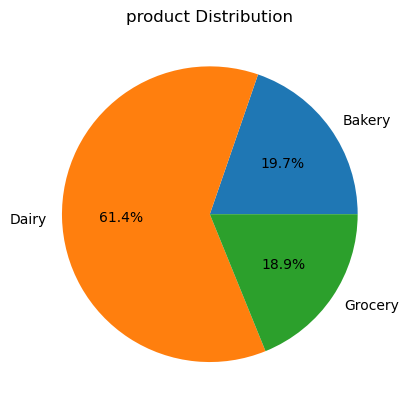

In [122]:
data = df.groupby('category').agg({'number_of_items_sold':'sum'})
product_line(data)

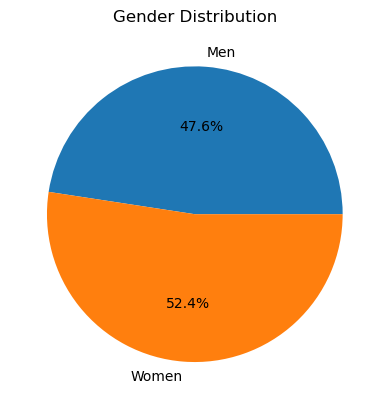

In [124]:
data = df.groupby('buyer_gender').agg({'number_of_items_sold':'sum'})
gender(data)

In [125]:
avg_daily_sales(df)

99977.43421052632

In [142]:
avg_monthly_sales(df)

total_revenue    3799142.5
dtype: float64

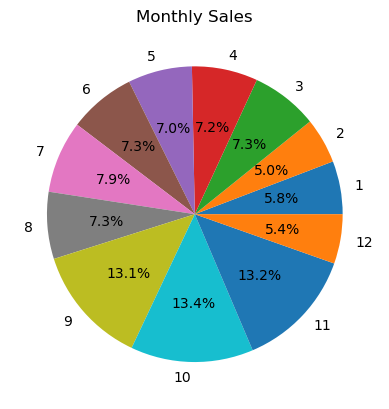

In [147]:
data = df.groupby('Month').agg({'number_of_items_sold': 'sum'})
monthly_sales(data)

In [145]:
data

,number_of_items_sold
Month,
1,14879
2,12759
3,18766
4,18451
5,17976
6,18759
7,20283
8,18774
9,33513


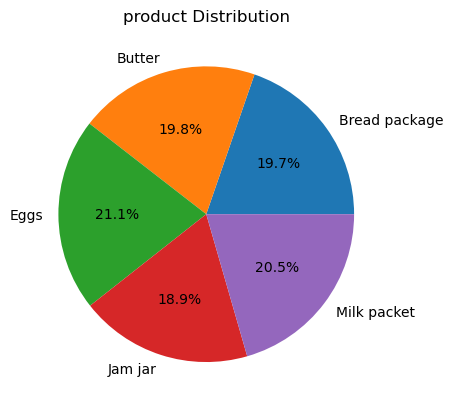

In [149]:
data = df.groupby('product_name').agg({'number_of_items_sold':'sum'})
product_line(data)

In [151]:
df.day_of_week.value_counts()

day_of_week
Sunday       5080
Saturday     4973
Tuesday      2560
Monday       2476
Thursday     2467
Wednesday    2414
Friday       2351
Name: count, dtype: int64

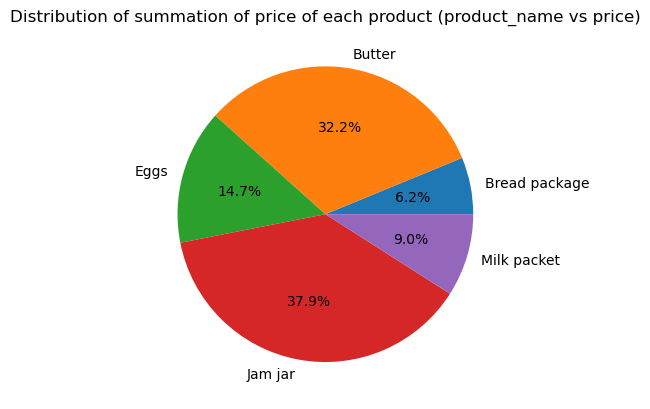

,price
product_name,
Bread package,249205
Butter,1288770
Eggs,590002
Jam jar,1517600
Milk packet,362320


In [170]:
data = df.groupby('product_name').agg({'price':'sum'})
plt.title('Distribution of summation of price of each product (product_name vs price)')
plt.pie(x=data.price,labels= data.index, autopct="%1.1f%%") 
plt.show()
data

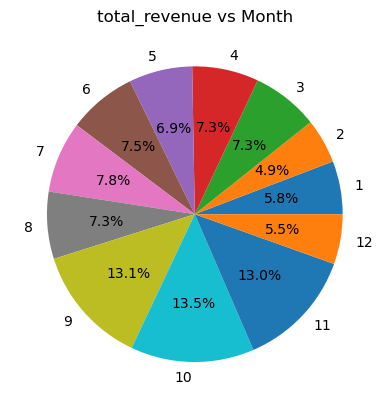

,total_revenue
Month,
1,2647463
2,2225120
3,3335727
4,3317821
5,3165451
6,3415466
7,3567782
8,3348062
9,5968980


In [169]:
# tot revenue by the month
data = df.groupby('Month').agg({'total_revenue':'sum'})
plt.title('total_revenue vs Month')
plt.pie(x=data.total_revenue,labels= data.index, autopct="%1.1f%%") 
plt.show()
data

<Axes: xlabel='number_of_items_sold', ylabel='category'>

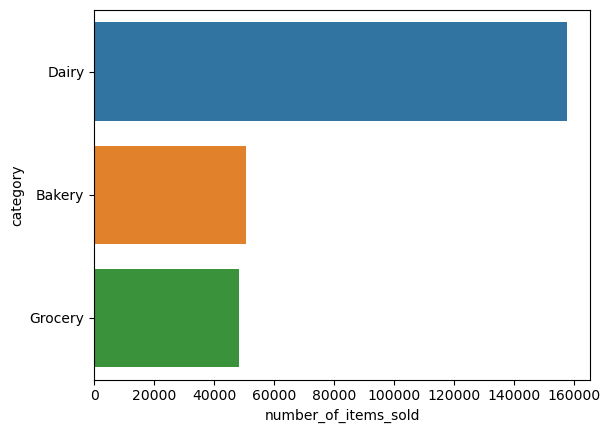

In [177]:
# sum of product of each category
data = df.groupby('category').agg({'number_of_items_sold':'sum'}).sort_values(by= 'number_of_items_sold', ascending=False).reset_index()
sea.barplot(data=data, x='number_of_items_sold', y='category')

<Axes: xlabel='number_of_items_sold', ylabel='category'>

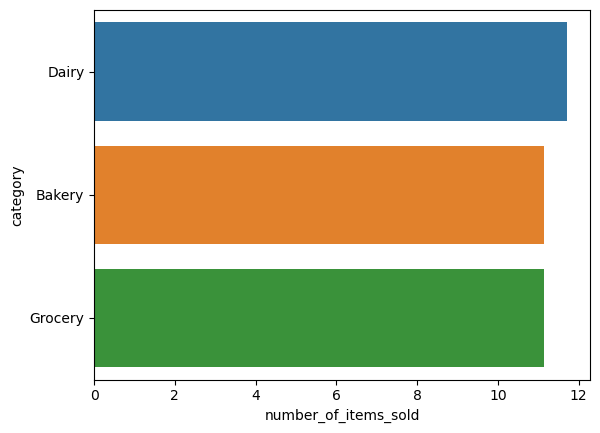

In [178]:
# mean of product of each category
data = df.groupby('category').agg({'number_of_items_sold':'mean'}).sort_values(by= 'number_of_items_sold', ascending=False).reset_index()
sea.barplot(data=data, x='number_of_items_sold', y='category')

In [195]:
df.holiday = df['holiday'].astype('int') 

In [196]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22321 entries, 0 to 22320
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   product_name          22321 non-null  object        
 1   category              22321 non-null  object        
 2   price                 22321 non-null  int64         
 3   sales_date            22321 non-null  datetime64[ns]
 4   day_of_week           22321 non-null  object        
 5   holiday               22321 non-null  int64         
 6   number_of_items_sold  22321 non-null  int64         
 7   total_revenue         22321 non-null  int64         
 8   sales_time            22321 non-null  object        
 9   product_id            22321 non-null  int64         
 10  buyer_gender          22321 non-null  object        
 11  Month                 22321 non-null  int64         
 12  Year                  22321 non-null  int64         
dtypes: datetime64[ns

In [242]:
## Lets prepare the data
input_col = ['product_name', 'category', 'price', 'sales_date', 'day_of_week',
       'holiday', 'total_revenue','product_id', 'buyer_gender', 'Month', 'Year', 'Day'] #'sales_time'
target_col = "number_of_items_sold"

In [243]:
inputs = df[input_col].copy()
target = df[target_col].copy()

In [244]:
numerical_col = inputs.select_dtypes(include=np.number).columns.to_list()
catgorical_col = inputs.select_dtypes(include='object').columns.to_list()
numerical_col, catgorical_col 

(['price', 'holiday', 'total_revenue', 'product_id', 'Month', 'Year', 'Day'],
 ['product_name', 'category', 'day_of_week', 'buyer_gender'])

In [245]:
inputs[numerical_col]

,price,holiday,total_revenue,product_id,Month,Year,Day
0,80,0,1440,1022,9,2022,1
1,55,0,440,1011,9,2022,1
2,285,0,4275,1078,9,2022,1
3,80,0,960,1022,9,2022,1
4,55,0,880,1011,9,2022,1
...,...,...,...,...,...,...,...
22316,285,0,9120,1078,11,2023,30
22317,134,0,3752,1041,11,2023,30
22318,55,0,770,1011,11,2023,30
22319,350,0,2800,1091,11,2023,30


In [246]:
inputs[catgorical_col]

,product_name,category,day_of_week,buyer_gender
0,Milk packet,Dairy,Thursday,Men
1,Bread package,Bakery,Thursday,Men
2,Butter,Dairy,Thursday,Women
3,Milk packet,Dairy,Thursday,Men
4,Bread package,Bakery,Thursday,Men
...,...,...,...,...
22316,Butter,Dairy,Thursday,Women
22317,Eggs,Dairy,Thursday,Women
22318,Bread package,Bakery,Thursday,Men
22319,Jam jar,Grocery,Thursday,Men


In [247]:
scaler = MinMaxScaler()
inputs[numerical_col] = scaler.fit_transform(inputs[numerical_col])

In [248]:
inputs[numerical_col]

,price,holiday,total_revenue,product_id,Month,Year,Day
0,0.084746,0.0,0.055081,0.1375,0.727273,0.0,0.000000
1,0.000000,0.0,0.015311,0.0000,0.727273,0.0,0.000000
2,0.779661,0.0,0.167827,0.8375,0.727273,0.0,0.000000
3,0.084746,0.0,0.035991,0.1375,0.727273,0.0,0.000000
4,0.000000,0.0,0.032810,0.0000,0.727273,0.0,0.000000
...,...,...,...,...,...,...,...
22316,0.779661,0.0,0.360509,0.8375,0.909091,1.0,0.966667
22317,0.267797,0.0,0.147027,0.3750,0.909091,1.0,0.966667
22318,0.000000,0.0,0.028435,0.0000,0.909091,1.0,0.966667
22319,1.000000,0.0,0.109167,1.0000,0.909091,1.0,0.966667


In [249]:
inputs[catgorical_col]

,product_name,category,day_of_week,buyer_gender
0,Milk packet,Dairy,Thursday,Men
1,Bread package,Bakery,Thursday,Men
2,Butter,Dairy,Thursday,Women
3,Milk packet,Dairy,Thursday,Men
4,Bread package,Bakery,Thursday,Men
...,...,...,...,...
22316,Butter,Dairy,Thursday,Women
22317,Eggs,Dairy,Thursday,Women
22318,Bread package,Bakery,Thursday,Men
22319,Jam jar,Grocery,Thursday,Men


In [253]:
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore').fit(inputs[catgorical_col])

/home/sanyam/anaconda3/envs/pytorch_nn/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [254]:
encoded_col = list(encoder.get_feature_names_out(catgorical_col))
# encoded_col

In [255]:
inputs[encoded_col] = (encoder.transform(inputs[catgorical_col]))

In [256]:
inputs[encoded_col]

,product_name_Bread package,product_name_Butter,product_name_Eggs,product_name_Jam jar,product_name_Milk packet,category_Bakery,category_Dairy,category_Grocery,day_of_week_Friday,day_of_week_Monday,day_of_week_Saturday,day_of_week_Sunday,day_of_week_Thursday,day_of_week_Tuesday,day_of_week_Wednesday,buyer_gender_Men,buyer_gender_Women
0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22316,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
22317,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
22318,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
22319,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [258]:
# As we have converted the num. and cat. column, now we have to merge them. 
inputs[numerical_col+encoded_col].to_csv("numeric_encoded_dataset.csv")

In [261]:
df_1= pd.read_csv('numeric_encoded_dataset.csv')
df_1.drop('Unnamed: 0', inplace=True, axis=1)

In [262]:
df_1.head()

,price,holiday,total_revenue,product_id,Month,Year,Day,product_name_Bread package,product_name_Butter,product_name_Eggs,...,category_Grocery,day_of_week_Friday,day_of_week_Monday,day_of_week_Saturday,day_of_week_Sunday,day_of_week_Thursday,day_of_week_Tuesday,day_of_week_Wednesday,buyer_gender_Men,buyer_gender_Women
0,0.084746,0.0,0.055081,0.1375,0.727273,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.000000,0.0,0.015311,0.0000,0.727273,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,0.779661,0.0,0.167827,0.8375,0.727273,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0.084746,0.0,0.035991,0.1375,0.727273,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,0.000000,0.0,0.032810,0.0000,0.727273,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [266]:
inputs = df_1.copy()
targets = target

In [275]:
train_x, test_x, train_y, test_y = train_test_split(inputs, \
                                       targets, test_size=0.2\
                                        , random_state=42)

In [276]:
## LR
lr= LinearRegression().fit(train_x,train_y)

In [277]:
lr.score(train_x, train_y), lr.score(test_x, test_y)

(0.7073594967124315, 0.6869036923955836)

In [278]:
mean_squared_error(lr.predict(train_x), train_y)

25.026882087885266

In [279]:
## xgboostReg
xgb=XGBRegressor()
xgb.fit(train_x,train_y)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [280]:
xgb.score(train_x, train_y), xgb.score(test_x, test_y)

(0.999888484282429, 0.9937495173989195)

In [281]:
mean_squared_error(xgb.predict(train_x), train_y)

0.009536925624581515

- Seems like **Xgboost** has given us the best possible accuracy
- **mse** value too is close to zero

## Future Work To Do
- Feature Importance
- Hyperparameter Tuning
- etc.